In [ ]:
#importing the libraries
import pandas as pd                                  
import numpy as np                                   
import random                                        
from nltk.stem.porter import PorterStemmer           
import string                                        
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Reviews.csv')

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
# Count non-unique review texts
dupe_texts = data.duplicated(subset=['Text'])
dupe_texts[dupe_texts == True].count()

174875

In [ ]:
# Select just the unique reviews
data = data.drop_duplicates(subset=['Text'])

In [ ]:
# Check counts and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393579 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393579 non-null  int64 
 1   ProductId               393579 non-null  object
 2   UserId                  393579 non-null  object
 3   ProfileName             393568 non-null  object
 4   HelpfulnessNumerator    393579 non-null  int64 
 5   HelpfulnessDenominator  393579 non-null  int64 
 6   Score                   393579 non-null  int64 
 7   Time                    393579 non-null  int64 
 8   Summary                 393576 non-null  object
 9   Text                    393579 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.0+ MB


In [ ]:
data['Text_len'] = data['Text'].apply(lambda x: len(x))
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


In [ ]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    3
Text                       0
Text_len                   0
dtype: int64

In [ ]:
# Make a copy of the dataset with just the feature and target
data = data[['HelpfulnessNumerator','HelpfulnessDenominator', 'Text']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393579 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    393579 non-null  int64 
 1   HelpfulnessDenominator  393579 non-null  int64 
 2   Text                    393579 non-null  object
dtypes: int64(2), object(1)
memory usage: 12.0+ MB


In [ ]:
# Lemmatize data

import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, pos='v') for w in word_list])
    return lemmatized_output

data['Text'] = data['Text'].apply(lemmatize)

In [ ]:
data.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Text
0,1,1,I have buy several of the Vitality can dog foo...
1,0,0,Product arrive label as Jumbo Salted Peanuts ....
2,1,1,This be a confection that have be around a few...
3,3,3,If you be look for the secret ingredient in Ro...
4,0,0,Great taffy at a great price . There be a wide...


In [ ]:
# Save the clean dataset
data.to_csv('data_clean.csv')

In [ ]:
# X1 contains 'Helpful'=0 if HelpfulnessNumerator=0
data1 = data.loc[:, ['Text']]
data1['Helpful'] = np.where(data['HelpfulnessNumerator'] > 0, 1, 0)

# X2 contains 'Helpful'=0 only if HelpfulnessNumerator=0 and HelpfulnessDenominator!=0
# So basically chucking all the data with no votes
data2 = data.loc[:, ['Text']]
data2['Helpful'] = np.where(data['HelpfulnessNumerator'] > 0, 1, 0)
data2.drop(data2[data['HelpfulnessDenominator'] == 0].index, inplace = True) 

In [ ]:
data1.head()

,Text,Helpful
0,I have buy several of the Vitality can dog foo...,1
1,Product arrive label as Jumbo Salted Peanuts ....,0
2,This be a confection that have be around a few...,1
3,If you be look for the secret ingredient in Ro...,1
4,Great taffy at a great price . There be a wide...,0


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you in

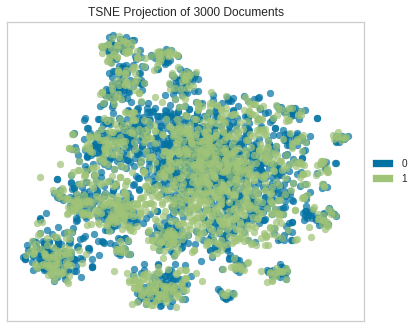

In [ ]:
# Create a sample of 3000 reviews and their labels
data_tsne = data1
data_brief = data_tsne.sample(3000)
data_brief.Helpful.value_counts()

from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

# Prepare the data
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data_brief.Text)
y = data_brief.Helpful

# Plot t-SNE
tsne = TSNEVisualizer()
tsne.fit(x, y)
tsne.show();

In [ ]:
data2.head()

,Text,Helpful
0,I have buy several of the Vitality can dog foo...,1
2,This be a confection that have be around a few...,1
3,If you be look for the secret ingredient in Ro...,1
8,Right now I 'm mostly just sprout this so my c...,1
10,I do n't know if it 's the cactus or the tequi...,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


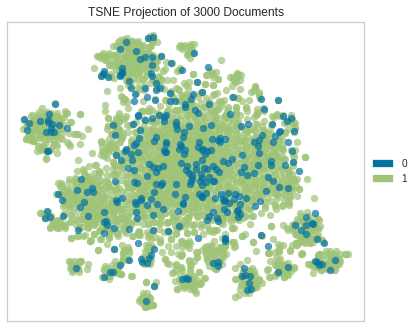

In [ ]:
# Create a sample of 3000 reviews and their labels
data_tsne = data2
data_brief = data_tsne.sample(3000)
data_brief.Helpful.value_counts()

from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

# Prepare the data
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data_brief.Text)
y = data_brief.Helpful

# Plot t-SNE
tsne = TSNEVisualizer()
tsne.fit(x, y)
tsne.show();

Percentage for default
0    207126
1    186453
Name: Helpful, dtype: int64
0    52.626283
1    47.373717
Name: Helpful, dtype: float64


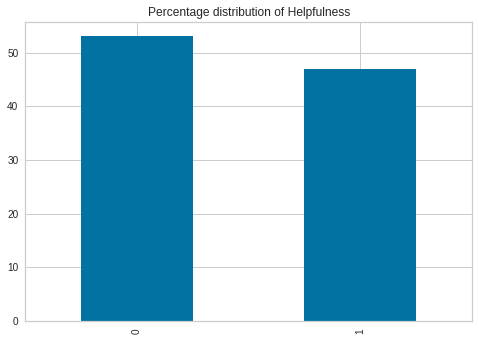

In [ ]:
#Checking the distribution of data
print('Percentage for default')
print(data1['Helpful'].value_counts())
print(data1['Helpful'].value_counts(normalize=True)*100)
round(data1.Helpful.value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Percentage distribution of Helpfulness')
plt.show()

Percentage for default
1    186453
0     22630
Name: Helpful, dtype: int64
1    89.176547
0    10.823453
Name: Helpful, dtype: float64


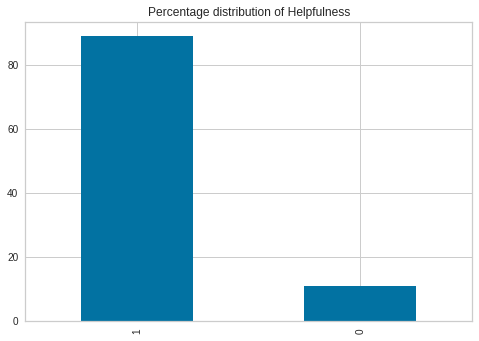

In [ ]:
#Checking the distribution of data
print('Percentage for default')
print(data2['Helpful'].value_counts())
print(data2['Helpful'].value_counts(normalize=True)*100)
round(data2.Helpful.value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Percentage distribution of Helpfulness')
plt.show()

In [ ]:
# Input and Output Parameters
y1 = data1['Helpful']
X1 = data1['Text']

In [ ]:
X1.head()

0    I have buy several of the Vitality can dog foo...
1    Product arrive label as Jumbo Salted Peanuts ....
2    This be a confection that have be around a few...
3    If you be look for the secret ingredient in Ro...
4    Great taffy at a great price . There be a wide...
Name: Text, dtype: object

In [ ]:
y1.head()

0    1
1    0
2    1
3    1
4    0
Name: Helpful, dtype: int64

In [ ]:
# Input and output parameters
y2 = data2['Helpful']
X2 = data2['Text']

In [ ]:
X2.head()

0     I have buy several of the Vitality can dog foo...
2     This be a confection that have be around a few...
3     If you be look for the secret ingredient in Ro...
8     Right now I 'm mostly just sprout this so my c...
10    I do n't know if it 's the cactus or the tequi...
Name: Text, dtype: object

In [ ]:
y2.head()

0     1
2     1
3     1
8     1
10    1
Name: Helpful, dtype: int64

In [ ]:
# Find splitting point for 80% train, 10% validation, 10% test
all_length1 = len(X1)
train_len1 = round(0.8 * all_length1)
val_len1 = round(0.1 * all_length1)

print('Train set length(X1):', train_len1)
print('Validation set length(y1):', val_len1)

Train set length(X1): 314863
Validation set length(y1): 39358


In [ ]:
# Find splitting point for 80% train, 10% validation, 10% test
all_length2 = len(X2)
train_len2 = round(0.8 * all_length2)
val_len2 = round(0.1 * all_length2)

print('Train set length(X2):', train_len2)
print('Validation set length(y2):', val_len2)

Train set length(X2): 167266
Validation set length(y2): 20908


In [ ]:
# Train-val-test split

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=val_len1,
                                                    random_state=123)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, 
                                                test_size=val_len1,
                                                random_state=123)

In [ ]:
X1_train

41079     My wife like to start her day with a taste of ...
493432    I buy this Imagine brand or Kroger 's Naturall...
235930    If you 're look for something to give a little...
441896    Out of the MIO flavor I 've try , the mango pe...
563045    These be so soft and really yummy . I like tha...
                                ...                        
256304    Our dog always have weepy eye , and the veteri...
452202    Once this product come I could not give it as ...
38272     all cure meats be over price with ship and han...
208303    Buying the mix in place of the freeze already ...
67156     We like raisins ( Sun Maid Raisins , 12-Ounce ...
Name: Text, Length: 314863, dtype: object

In [ ]:
y1_train

41079     0
493432    0
235930    0
441896    1
563045    0
         ..
256304    0
452202    1
38272     1
208303    1
67156     1
Name: Helpful, Length: 314863, dtype: int64

In [ ]:
# Train-val-test split
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=val_len2,
                                                    random_state=123)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, 
                                                test_size=val_len2,
                                                random_state=123)

In [ ]:
# Check that classes are roughly equally represented in each set
print(y1_train.value_counts(normalize=True))
print(y1_val.value_counts(normalize=True))
print(y1_test.value_counts(normalize=True))

0    0.52559
1    0.47441
Name: Helpful, dtype: float64
0    0.529219
1    0.470781
Name: Helpful, dtype: float64
0    0.528685
1    0.471315
Name: Helpful, dtype: float64


In [ ]:
# Check that classes are roughly equally represented in each set
print(y2_train.value_counts(normalize=True))
print(y2_val.value_counts(normalize=True))
print(y2_test.value_counts(normalize=True))

1    0.891676
0    0.108324
Name: Helpful, dtype: float64
1    0.894251
0    0.105749
Name: Helpful, dtype: float64
1    0.889994
0    0.110006
Name: Helpful, dtype: float64


In [ ]:
#Removing Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

stop_list = stopwords.words('english')
stop_list += list(string.punctuation)
stop_list += ['br', '.<', '..', '...', '``', "''", '--']

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Random Forest model on Bigrams

In [ ]:
# Fit a CountVectorizer-RandomForest pipeline (~ 3.5 min.)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_bigram_rf = Pipeline([('vectorizer', CountVectorizer(analyzer='word', 
                                                          ngram_range=(2, 2), 
                                                          stop_words=stop_list, 
                                                          max_features=100)),
                        ('forest', RandomForestClassifier(n_estimators=100,
                                                          n_jobs=-1))])

In [ ]:
pipe_bigram_rf.fit(X1_train, y1_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=100, ngram_range=(2, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('forest', RandomForestClassifier(n_jobs=-1))])

In [ ]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y1_pred_train = pipe_bigram_rf.predict(X1_train)
print('Training accuracy:', accuracy_score(y1_train, y1_pred_train))

Training accuracy: 0.6028145574424432


In [ ]:
# Validate
y1_pred_val = pipe_bigram_rf.predict(X1_val)
print('Validation accuracy:', accuracy_score(y1_val, y1_pred_val))

Validation accuracy: 0.5357995833121602


In [ ]:
pipe_bigram_rf.fit(X2_train, y2_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=100, ngram_range=(2, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('forest', RandomForestClassifier(n_jobs=-1))])

In [ ]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y2_pred_train = pipe_bigram_rf.predict(X2_train)
print('Training accuracy:', accuracy_score(y2_train, y2_pred_train))

Training accuracy: 0.9012716196261068


In [ ]:
# Validate
y2_pred_val = pipe_bigram_rf.predict(X2_val)
print('Validation accuracy:', accuracy_score(y2_val, y2_pred_val))

Validation accuracy: 0.8910464893820547


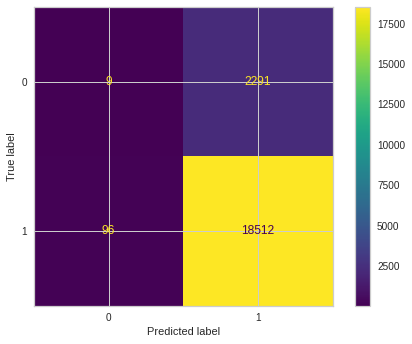

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_bigram_rf, X2_test, y2_test) 



## Random Forest model on Unigrams and Bigrams

In [ ]:
# Fit a CountVectorizer-RandomForest pipeline (~ 3.5 min.)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_bigram_rf = Pipeline([('vectorizer', CountVectorizer(analyzer='word', 
                                                          ngram_range=(1, 2), 
                                                          stop_words=stop_list, 
                                                          max_features=100)),
                        ('forest', RandomForestClassifier(n_estimators=100,
                                                          n_jobs=-1))])

pipe_bigram_rf.fit(X1_train, y1_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=100, ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('forest', RandomForestClassifier(n_jobs=-1))])

In [ ]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y1_pred_train = pipe_bigram_rf.predict(X1_train)
print('Training accuracy:', accuracy_score(y1_train, y1_pred_train))

Training accuracy: 0.9863146828938301


#### Data is definitely overfitting here.

In [ ]:
# Validate
y1_pred_val = pipe_bigram_rf.predict(X1_val)
print('Validation accuracy:', accuracy_score(y1_val, y1_pred_val))

Validation accuracy: 0.5524162813151074


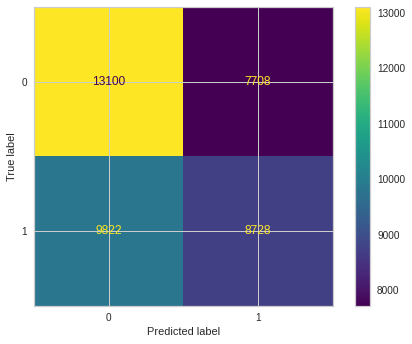

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_bigram_rf, X1_test, y1_test) 


## Multinomial Naive-Bayes on TF-IDF values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stop_list)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

nb_clf = clf.fit(X1_train, y1_train)
print('Accuracy:', nb_clf.score(X1_val, y1_val))

Accuracy: 0.6001829361248031


In [ ]:
# Validate
y1_pred_val = nb_clf.predict(X1_val)
print('Validation accuracy:', accuracy_score(y1_val, y1_pred_val))

Validation accuracy: 0.6001829361248031


In [ ]:
print(y1_pred_val)

[1 0 1 ... 0 0 0]


In [ ]:
nb_clf = clf.fit(X2_train, y2_train)
print('Accuracy:', nb_clf.score(X2_val, y2_val))

Accuracy: 0.8940596900707863


## Train a Random Forest model on TF-IDF values¶


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_tfidf_rf = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stop_list, 
                                                         max_features=100)),
                          ('forest', RandomForestClassifier(n_estimators=100,
                                                            n_jobs=-1))])

pipe_tfidf_rf.fit(X1_train, y1_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=100,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('forest', RandomForestClassifier(n_jobs=-1))])

In [ ]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_tfidf_rf.predict(X1_train)
print('Training accuracy:', accuracy_score(y1_train, y1_pred_train))
print(classification_report(y1_train, y1_pred_train))

Training accuracy: 0.9863146828938301
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    165489
           1       0.99      0.98      0.99    149374

    accuracy                           0.99    314863
   macro avg       0.99      0.99      0.99    314863
weighted avg       0.99      0.99      0.99    314863



In [ ]:
# Validate
y_pred_val = pipe_tfidf_rf.predict(X1_val)
print('Validation accuracy:', accuracy_score(y1_val, y1_pred_val))
print(classification_report(y1_val, y1_pred_val))

Validation accuracy: 0.6001829361248031
              precision    recall  f1-score   support

           0       0.60      0.76      0.67     20829
           1       0.61      0.43      0.50     18529

    accuracy                           0.60     39358
   macro avg       0.60      0.59      0.58     39358
weighted avg       0.60      0.60      0.59     39358



In [ ]:
confusion_matrix(y1_val, y1_pred_val)

array([[15738,  5091],
       [10645,  7884]])